<h1 style="text-align: center;" markdown="2">Effect of regularization and choice of optimization model in deep learning's performance</h1>
<h3 style="text-align: center;font-weight= normal;">Phuc Le</h3>
<h3 style="text-align: center;font-weight= normal;">Mercer University</h3>
<h3 style="text-align: center;font-weight= normal;">lephuc66@gmail.com</h3>


<h2 style="text-align: center;" markdown="2">Abstract</h2>

The performance of an deep learning algorithm depends on how well the researchers choose the optimization model, regularization method and the hypermeters to fit with the dataset. In this paper, we will only focus on analysing the use of optimization models and regularization methods. In the first part,we will demonstrate the effect of applying regularization by using normal regularization and drop-out into normal deep learning algorithm. In the second part, we will compare the performance of 3 models : Batch Gradient Descent(BGD), Stochastic Gradient Descent(SGD),and Mini-Batch Gradident Descent(MBGD). Then Adam mode will be introduced to MBGD to significantly improve the result.

## 1. Introduction

The rise of interest about neural networks in both academia and public environment starts with a breakthrough in 2006, when Geoffrey Hinton published a well-recieved paper showing the effifency of an algorithm called "greedy layer-wise" pretraining _(Hinton et al.,2006)_. Another breakthrough come in the ImageNet competition, when Alex Krizhevsky, Ilya Sutskever,and Geoffrey Hinton achieved significant improvement in accuracy using Deep Convolutional Convolutional Networks _(Krizhevsky et al., 2012)_. The impressive performance of those algorithms compared to tradditional machine learning methods had not only attracted intention among researchers, but also in popular culture, under the term "deep learning". However, despite being a powerful tool, applying deep learning is an iterative process and cannot be generalized easily. Until now, there is still no systematic way to choose the hyperparameters that can be applied to all problems. However, there are some optimization models and regularization methods which are quite popular among researchers. In the first part, by applying right regulation methods, we have increased **3.5%** accuracy. In the second part, MGBD with Adam mode can achieved a same level of accuracy with the SGD while the cost is significantly lower.  

## 2. Regulization

A big problems of Deep Learning models is overfitting, when the program tries too hard to fit the training set as much as possible, thus reduce the ability to generalize to the examples in dev and test set, which it has never seen. A standard way to avoid that is to apply *L2 regularization*, which involve modifying the cost function.

Normal cost function:

$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small  y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} \tag{1}$$
Cost function using regularization:
$$J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} \tag{2}$$

Drop-out is another technique that is widely used in Deep Learning models to reduce overfitting. The main idea is it will randomly remove some neurons in each iteration.
<img src="images/dropout.png" style="width:750px;height:360px;">
<caption><center> <u> **Figure 1** </u>: **Dropout Illustration**<br> Srivastava, Nitish, et al. ”Dropout: a simple way to prevent neural networks from overfitting”, JMLR 2014 </center></caption>

Drop-out is applied in both forward propagation and backward propagation phase. The weight of the nodes which have been removed will be distributed to those nodes that still remained. 

In this part, we will use a data set of points illustrate as below. Our goal is to divide the plane into red and blue spaces, where the points of respestive color is most likely to appear.

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import scipy.io
from reg_utils import *


%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

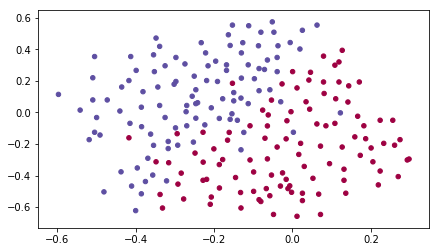

In [2]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()

Let's train the model without any regularization, and observe the accuracy on the train/test sets.

Cost after iteration 0: 0.6557412523481002
Cost after iteration 10000: 0.1632998752572419
Cost after iteration 20000: 0.13851642423239133


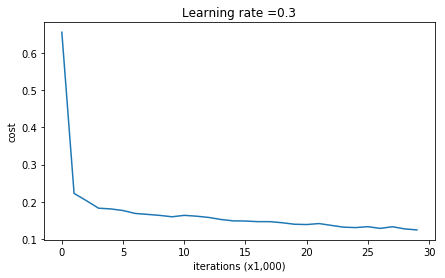

On the training set:
Accuracy: 0.947867298578
On the test set:
Accuracy: 0.915


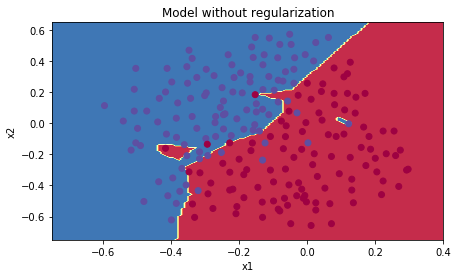

In [3]:
parameters = model(train_X, train_Y)
print ("On the training set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

# The result
plt.title("Model without regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Without any modification, we can achieve 94.7% accuracy on the training set and 91.5% on the test set. The red and blue spaces are scatttered, since the model try to match up with the traininging set.Now, we will apply regularization with *lambda* = 0.7 to the model.

Cost after iteration 0: 0.6974484493131264
Cost after iteration 10000: 0.2684918873282239
Cost after iteration 20000: 0.2680916337127301


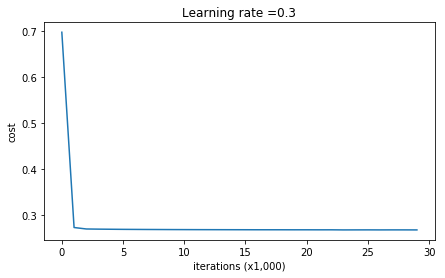

On the train set:
Accuracy: 0.938388625592
On the test set:
Accuracy: 0.93


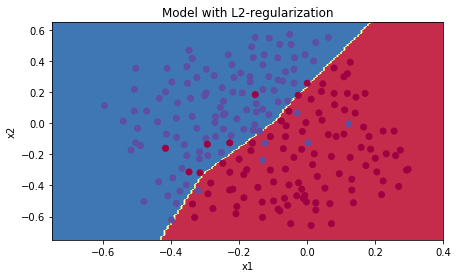

In [4]:
parameters = model(train_X, train_Y, lambd = 0.7)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)
plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Using the same model with normal regularization, we can achieve **1.5%** increase in test set performance. The model now does not try to overfit the training set, but rather accept the loss of few mismatch points in order to increase generalization.
Finally, we will apply try applying to the model with keep_prob = 0.86

Cost after iteration 0: 0.6543912405149825


d:\Programming\Deep-Learning\reg_utils.py:228: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
d:\Programming\Deep-Learning\reg_utils.py:228: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 10000: 0.061016986574905605
Cost after iteration 20000: 0.060582435798513114


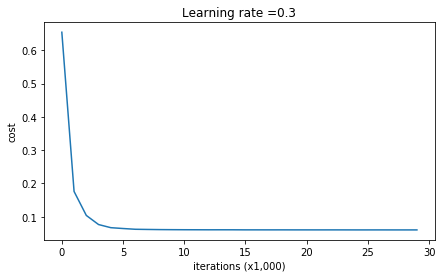

On the train set:


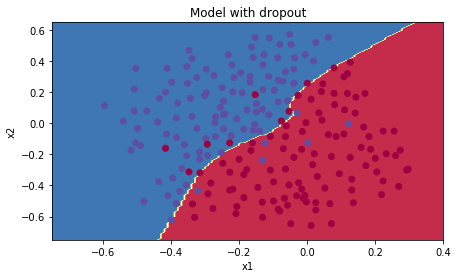

In [5]:
parameters = model(train_X, train_Y, keep_prob = 0.86, learning_rate = 0.3)
print ("On the train set:")
#predictions_train = predict(train_X, train_Y, parameters)
#print ("On the test set:")
#predictions_test = predict(test_X, test_Y, parameters)
plt.title("Model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

With dropout, the accuracy of the test set increases **95%**. Like regularization, the increase in accuracy in the test set come with the price with the decrease in training set.
**Here are the results of our three models**: 

<table> 
    <tr>
        <td>
        **model**
        </td>
        <td>
        **train accuracy**
        </td>
        <td>
        **test accuracy**
        </td>

    </tr>
        <td>
        3-layer NN without regularization
        </td>
        <td>
        95%
        </td>
        <td>
        91.5%
        </td>
    <tr>
        <td>
        3-layer NN with L2-regularization
        </td>
        <td>
        94%
        </td>
        <td>
        93%
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with dropout
        </td>
        <td>
        93%
        </td>
        <td>
        95%
        </td>
    </tr>
</table> 

## 3. Models

In [6]:
from opt_utils import *

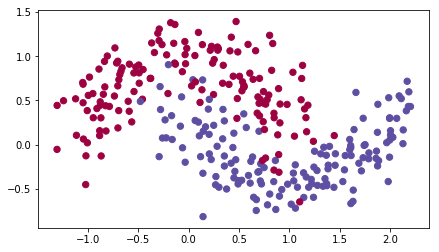

In [7]:
train_X, train_Y = load_dataset()

Cost after epoch 0: 0.702414
Cost after epoch 1000: 0.694312
Cost after epoch 2000: 0.687147
Cost after epoch 3000: 0.680783
Cost after epoch 4000: 0.674570
Cost after epoch 5000: 0.668099
Cost after epoch 6000: 0.661545
Cost after epoch 7000: 0.655195
Cost after epoch 8000: 0.648970
Cost after epoch 9000: 0.642384
Computation time: 5 s


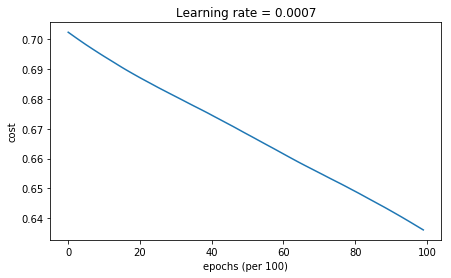

Accuracy: 0.66


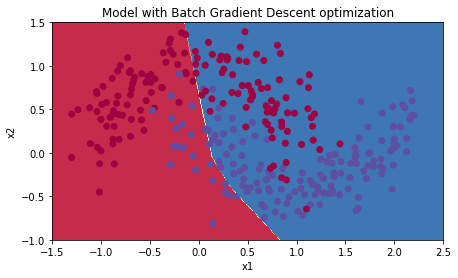

In [8]:
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd",mini_batch_size = train_X.shape[1])

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Batch Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

With BGD, we only got 66% accuracy, and the learning rate is quite smooth. Consider this as the **baseline**. Next, we will use Stochastic Gradient Descent to the same data set.

Cost after epoch 0: 0.694365
Cost after epoch 1000: 0.043167
Cost after epoch 2000: 0.881007
Cost after epoch 3000: 0.021047
Cost after epoch 4000: 0.029330
Cost after epoch 5000: 1.329456
Cost after epoch 6000: 0.009625
Cost after epoch 7000: 0.009301
Cost after epoch 8000: 0.007487
Cost after epoch 9000: 0.000009
Computation time: 519 s


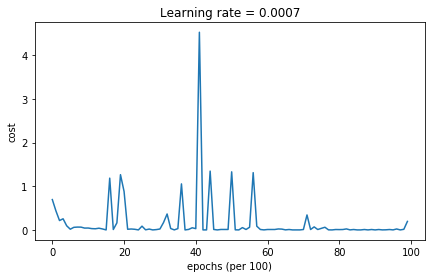

Accuracy: 0.946666666667


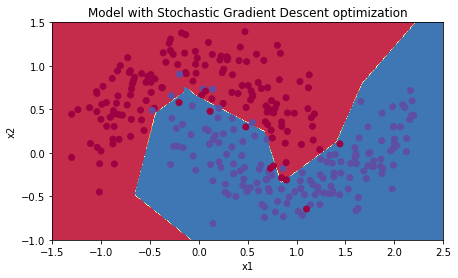

In [9]:
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd",mini_batch_size = 1)

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Stochastic Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

With SGD, we have increased our accuracy significantly. However, the learning rate fluctatate rapidly. When it came to epoch 5000, the cost is larger than 1, means that we're doing worse than before. The computation time also rise exponentially, with 567s compared to only 7s with the BGD (8100% increase). Next, we will apply Mini-Batch Gradient Descent.

Cost after epoch 0: 0.690736
Cost after epoch 1000: 0.685273
Cost after epoch 2000: 0.647072
Cost after epoch 3000: 0.619525
Cost after epoch 4000: 0.576584
Cost after epoch 5000: 0.607243
Cost after epoch 6000: 0.529403
Cost after epoch 7000: 0.460768
Cost after epoch 8000: 0.465586
Cost after epoch 9000: 0.464518
Computation time: 13 s


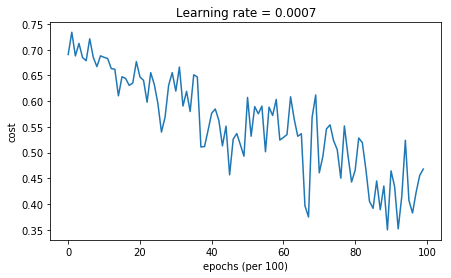

Accuracy: 0.796666666667


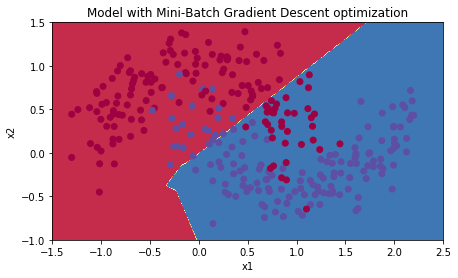

In [10]:
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd")

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Mini-Batch Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

The MBGD seems to be a medium between the BGD and SGD. With 7s higher in computation time(100% increase) compared to BGD, the MGBD increase accuracy by 13.6%. Here's the table comparing the performance of these 3 methods. 
<table> 
    <tr>
        <td>
        **Model**
        </td>
        <td>
        **Accuracy**
        </td>
        <td>
        **Time**
        </td>

    </tr>
        <td>
        Batch Gradient Descent
        </td>
        <td>
        66%
        </td>
        <td>
        7s
        </td>
    <tr>
        <td>
        Stochastic Gradient Descent
        </td>
        <td>
        94.67%
        </td>
        <td>
        567s
        </td>
    </tr>
    <tr>
        <td>
        Mini Batch Gradient Descent
        </td>
        <td>
        79.6%
        </td>
        <td>
        14s
        </td>
    </tr>
</table> 


Although SGD achieved amazing result in accuracy, the cost is too high. Thus, MBGD seems to be a more reasonable option. In fact, both SGD and BGD can be represented by MBGD, with SGD at one end and BGD at another. Next, we will apply in turn apply Adam mode_(Kingma, 2015)_ into MBGD model. Adam mode is the combination of 2 methods: momentum and RMSprob.

Cost after epoch 0: 0.690552
Cost after epoch 1000: 0.185567
Cost after epoch 2000: 0.150852
Cost after epoch 3000: 0.074454
Cost after epoch 4000: 0.125936
Cost after epoch 5000: 0.104235
Cost after epoch 6000: 0.100552
Cost after epoch 7000: 0.031601
Cost after epoch 8000: 0.111709
Cost after epoch 9000: 0.197648
Computation time: 26 s


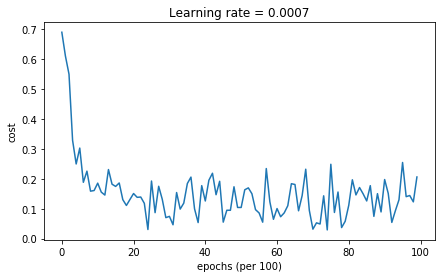

Accuracy: 0.94


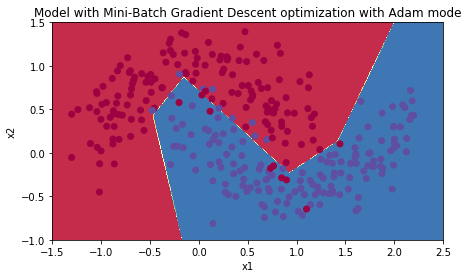

In [11]:
parameters = model(train_X, train_Y, layers_dims, optimizer = "adam")

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Mini-Batch Gradient Descent optimization with Adam mode")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

With the help of Adam mode, the MBGD accuracy improves significantly. With only 0.6% lower in accuracy compared to the SGD, MGBD with Adam mode only takes 25s to compute.


## 4. Conclusion
We have introduced and analysed the use of regularization and optimization models in Deep Learning. The use of regularization helps reducing overfitting, increase generalization, which will increase accuracy. Mini-Batch Gradient Descent, with Adam mode strikes the right balance between accuracy and computing time. 


## Reference
Hinton, G. E., Osdindero, S., and Teh, Y.(2006). A fast learning algorithm for deep belief net. _Neural Computation_, *18*, 1557 - 1554.

Krizhevsky, A., Sutskever, I., and Hinton, G. E.  ImageNet classification with deep convolutional neural net- works. _NIPS_, pp. 1106–1114, 2012.

Srivastava, Nitish, et al. Dropout: a simple way to prevent neural networks from
overfitting.JMLR, 2014

Kingma,D. P., Jimmy, L.,(2015). Adam: A method for Stochastic Optimization. Retrieved at https://arxiv.org/pdf/1412.6980.pdf on 1/8/2018.

Deep Learning Specilization Material. Coursera, 2018